In [1]:
from keras.applications import VGG16
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
import os
import cv2
import pickle
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

c:\Users\Taha\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Taha\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Taha\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/

In [2]:
model = VGG16(include_top=False,input_shape=(48,144,3),pooling=None)

In [3]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 144, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 48, 144, 64)    │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 48, 144, 64)    │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 24, 72, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 24, 72, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 24, 72, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 36, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 36, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 36, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 18, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 18, 512)     │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 18, 512)     │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 18, 512)     │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
for l in model.layers:
    l.trainable=False

In [5]:
a = Flatten()(model.output)
a = Dense(64,activation='relu')(a)
a = Dense(32,activation='softmax')(a)
model2 = Model(model.input,a)
model2.compile('adam','categorical_crossentropy',metrics=['accuracy'])


In [6]:
model2.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 144, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 48, 144, 64)    │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 48, 144, 64)    │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 24, 72, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 24, 72, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 24, 72, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 36, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 36, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 36, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 18, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 18, 512)     │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 18, 512)     │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 18, 512)     │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,904 (56.64 MB)

 Trainable params: 133,216 (520.38 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [7]:
with open('encoder.bin','rb')as f:
    encoder = pickle.load(f)

c:\Users\Taha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.3.2 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [8]:
encoder.classes_

array(['2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E',
       'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T',
       'U', 'V', 'W', 'X', 'Y', 'Z'], dtype='<U1')

In [9]:
def datagenerator(path, batch_size=100,c=0):
    pattern= os.path.join(path,'*.png')
    fills= glob(pattern)
    offset=0
    while offset<len(fills):
        items = fills[offset:offset+batch_size]
        offset+=batch_size
        x = []
        y = []
        for f in items:
            char = list(os.path.splitext(os.path.basename(f))[0])[c]
            im = load_img(f)
            im = img_to_array(im)
            im = imagenet_utils.preprocess_input(im)
            im = cv2.resize(im,(144,48))
            x.append(im)
            y.append(to_categorical(encoder.transform([char]),num_classes=len(encoder.classes_)).reshape(-1))
        X = np.array(x,ndmin=4)
        Y = np.array(y,ndmin=2)
        yield X,Y

In [10]:
data = datagenerator('../../Noron/2_1_Convolutional/train/')
for x,y in data:
    print(len(x),len(y))
    print(x.shape,y.shape)

100 100
(100, 48, 144, 3) (100, 32)
100 100
(100, 48, 144, 3) (100, 32)
100 100
(100, 48, 144, 3) (100, 32)
100 100
(100, 48, 144, 3) (100, 32)
100 100
(100, 48, 144, 3) (100, 32)
100 100
(100, 48, 144, 3) (100, 32)
100 100
(100, 48, 144, 3) (100, 32)
100 100
(100, 48, 144, 3) (100, 32)
100 100
(100, 48, 144, 3) (100, 32)
100 100
(100, 48, 144, 3) (100, 32)
100 100
(100, 48, 144, 3) (100, 32)
100 100
(100, 48, 144, 3) (100, 32)
100 100
(100, 48, 144, 3) (100, 32)
100 100
(100, 48, 144, 3) (100, 32)
100 100
(100, 48, 144, 3) (100, 32)
100 100
(100, 48, 144, 3) (100, 32)
100 100
(100, 48, 144, 3) (100, 32)
100 100
(100, 48, 144, 3) (100, 32)
100 100
(100, 48, 144, 3) (100, 32)
100 100
(100, 48, 144, 3) (100, 32)
100 100
(100, 48, 144, 3) (100, 32)
100 100
(100, 48, 144, 3) (100, 32)
100 100
(100, 48, 144, 3) (100, 32)
100 100
(100, 48, 144, 3) (100, 32)
100 100
(100, 48, 144, 3) (100, 32)
100 100
(100, 48, 144, 3) (100, 32)
100 100
(100, 48, 144, 3) (100, 32)
100 100
(100, 48, 144, 3) (1

In [11]:
h = model2.fit(datagenerator('../../Noron/2_1_Convolutional/train/'),epochs=20)


Epoch 1/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.0228 - loss: 4.6056
Epoch 2/20


c:\Users\Taha\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\epoch_iterator.py:164: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.0200 - loss: 3.4145
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.0250 - loss: 3.4124
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.0350 - loss: 3.4072
Epoch 5/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.3250 - loss: 3.3998
Epoch 6/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.4900 - loss: 3.3906
Epoch 7/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.4800 - loss: 3.3793
Epoch 8/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.4500 - loss: 3.3654
Epoch 9/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.4400 - loss: 3.3489
Epoch 10/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.3950 - loss: 3.3296
Epoch 11/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.3750 - loss: 3.3063
Epoch 12/20


KeyboardInterrupt: 

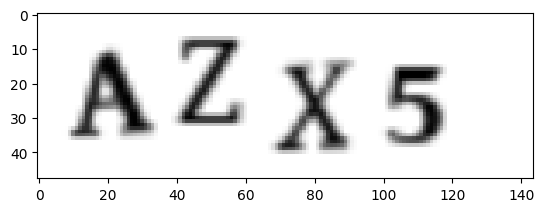

In [12]:
f = ('../../Noron/2_1_Convolutional/test/AZX5.png')
im = cv2.imread(f)
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im = cv2.resize(im,(144,48))
im = np.array(im)
# f = imagenet_utils.preprocess_input(f)
# f = cv2.resize(f,(144,48))
# f.shape
plt.imshow(im)


In [13]:
p = model2.predict(im.reshape(1,48,144,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


In [14]:
encoder.inverse_transform((p[0].argmax(),))

array(['2'], dtype='<U1')